In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sales_df = pd.read_csv("Sales Table.csv")
sales_df = sales_df.drop(['Unnamed: 0'], axis = 1)
sales_df.head(10)

,Date,Number of units sold per week,Promotional Period,ProductID
0,05-02-2010,1643690.90,0,725
1,12-02-2010,1641957.44,1,37
2,19-02-2010,1611968.17,0,786
3,26-02-2010,1409727.59,0,44
4,05-03-2010,1554806.68,0,703
5,12-03-2010,1439541.59,1,134
6,19-03-2010,1472515.79,0,58
7,26-03-2010,1404429.92,0,1351
8,02-04-2010,1594968.28,0,725
9,09-04-2010,1545418.53,1,61


In [4]:
products_df = pd.read_csv("Product Table.csv")
products_df = products_df.drop(['Unnamed: 0'], axis = 1)
products_df.head(10)

,ProductID,Category,Product Name,Product Price
0,1360,Sporting Goods,Smart watch,327.750000
1,365,Cleats,Perfect Fitness Perfect Rip Deck,59.990002
2,627,Shop By Sport,Under Armour Girls' Toddler Spine Surge Runni,39.990002
3,502,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000
4,278,Electronics,Under Armour Men's Compression EV SL Slide,44.990002
5,249,Boxing & MMA,Under Armour Women's Micro G Skulpt Running S,54.970001
6,191,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,99.989998
7,917,Trade-In,Glove It Women's Mod Oval 3-Zip Carry All Gol,21.990000
8,828,Electronics,Bridgestone e6 Straight Distance NFL San Dieg,31.990000
9,642,Shop By Sport,Columbia Men's PFG Anchor Tough T-Shirt,30.000000


In [5]:
# join on Product ID
sales_df = sales_df.set_index('ProductID')
products_df = products_df.set_index('ProductID')
joined_df = sales_df.join(products_df, lsuffix="_sales", rsuffix="_products")
joined_df.head(10)

,Date,Number of units sold per week,Promotional Period,Category,Product Name,Product Price
ProductID,,,,,,
725,05-02-2010,1643690.90,0,Golf Shoes,LIJA Women's Button Golf Dress,108.000000
37,12-02-2010,1641957.44,1,Baseball & Softball,adidas Kids' F5 Messi FG Soccer Cleat,34.990002
786,19-02-2010,1611968.17,0,Golf Gloves,TaylorMade 2014 Purelite Stand Bag,179.990005
44,26-02-2010,1409727.59,0,Baseball & Softball,adidas Men's F10 Messi TRX FG Soccer Cleat,59.990002
703,05-03-2010,1554806.68,0,Golf Apparel,Top Flite Women's 2014 XL Hybrid,19.990000
134,12-03-2010,1439541.59,1,Hockey,Nike Women's Legend V-Neck T-Shirt,25.000000
58,19-03-2010,1472515.79,0,Basketball,Diamondback Boys' Insight 24 Performance Hybr,299.989990
1351,26-03-2010,1404429.92,0,Computers,Dell Laptop,1500.000000
725,02-04-2010,1594968.28,0,Golf Shoes,LIJA Women's Button Golf Dress,108.000000


In [6]:
### EDA
df = joined_df

# drop day from Date column
df['Date'] = df['Date'].str[3:]

# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')

# extract month from Date
df['Month'] = df['Date'].dt.strftime('%b')

# Shorten column names
df = df.rename(columns={"Number of units sold per week": "Sales"})

# normalise Sales column
df['log_sales'] = np.log(df['Sales'])
df['scaled_sales'] = np.log(df['Sales'] / df['Product Price'])

# sort by date
df = df.sort_values('Date')

df

,Date,Sales,Promotional Period,Category,Product Name,Product Price,Month,log_sales,scaled_sales
ProductID,,,,,,,,,
725,2010-02-01,1643690.90,0,Golf Shoes,LIJA Women's Button Golf Dress,108.000000,Feb,14.312455,9.630324
93,2010-02-01,421642.19,0,Lacrosse,Under Armour Men's Tech II T-Shirt,24.990000,Feb,12.951912,9.733437
403,2010-02-01,407204.86,1,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,Feb,12.917072,8.049614
191,2010-02-01,1865097.27,0,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,99.989998,Feb,14.438824,9.833754
564,2010-02-01,2124451.54,0,Girls' Apparel,Nike Men's Deutschland Weltmeister Winners Bl,30.000000,Feb,14.569024,11.167827
...,...,...,...,...,...,...,...,...,...
502,2012-10-01,443557.65,0,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Oct,13.002583,9.090560
926,2012-10-01,410804.39,0,Trade-In,Glove It Imperial Golf Towel,15.990000,Oct,12.925872,10.153909
1354,2012-10-01,424513.08,1,DVDs,DVDs,164.380005,Oct,12.958698,7.856517


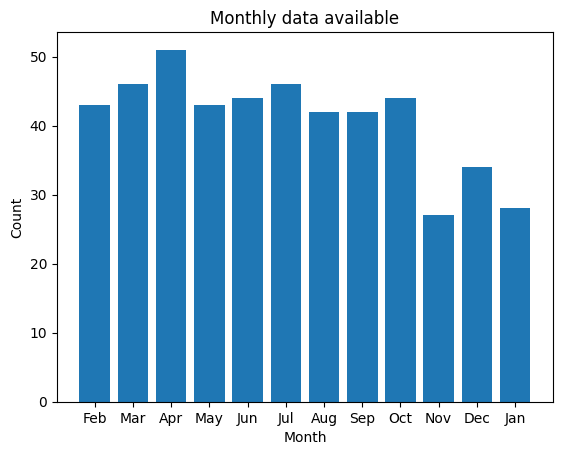

In [19]:
df['count'] = df.groupby('Month')['Month'].transform('count')

plt.bar(df['Month'], df['count'])

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly data available")
plt.show()

In [ ]:
'''
lesser data in Novemeber and January could be an issue,
but according to monthly sales below, November has higher sales
and January's sales does not underperform
'''

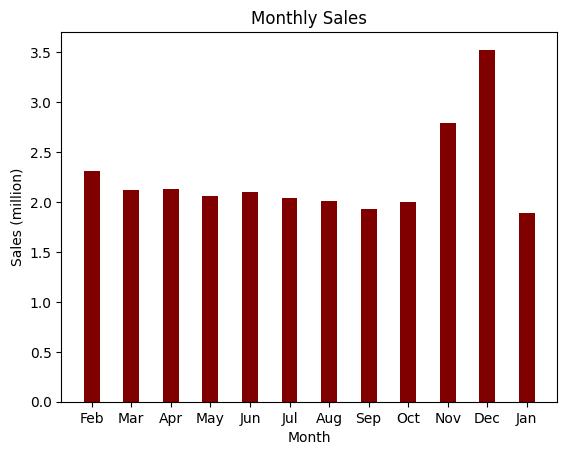

In [24]:
plt.bar(df['Month'], df['Sales'] / 1e6, color ='maroon', 
        width = 0.4)

plt.xlabel("Month")
plt.ylabel("Sales (million)")
plt.title("Monthly Sales")
plt.show()

Text(0, 0.5, 'Sales (log)')

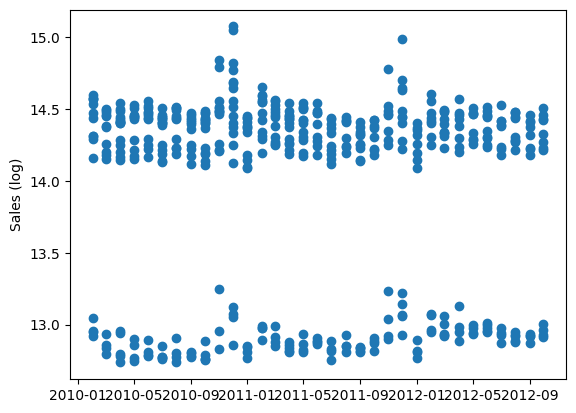

In [25]:
# before grouping by category

plt.scatter(df['Date'], df['log_sales'])
plt.ylabel("Sales (log)")

In [ ]:
'''
November and December sees a surge in sales.
Other months stay relative constant at 2 million.
Makes sense to increase inventory levels during November and December.
'''

In [26]:
grouped_data = df.groupby(['Category'])['log_sales'].sum().reset_index()

# get top 10 performing categories
grouped_data.sort_values('log_sales', ascending = False).head(10)

,Category,log_sales
17,Electronics,576.494966
25,Golf Gloves,473.356213
31,Kids' Golf Clubs,470.503745
0,Accessories,389.907114
21,Girls' Apparel,308.297270
41,Strength Training,277.802108
26,Golf Shoes,268.690697
24,Golf Balls,252.681450
35,Men's Golf Clubs,236.126719
44,Trade-In,223.911589


In [27]:
# check if result above is skewed by product price

scaled_data = df.groupby(['Category'])['scaled_sales'].sum().reset_index()
scaled_data.sort_values('scaled_sales', ascending = False).head(10)

# top 10 categories seem to remain intact!

,Category,scaled_sales
17,Electronics,427.295417
25,Golf Gloves,311.772853
0,Accessories,299.789793
31,Kids' Golf Clubs,297.045315
21,Girls' Apparel,231.132768
24,Golf Balls,200.993046
26,Golf Shoes,182.200236
44,Trade-In,169.718679
35,Men's Golf Clubs,154.066231
41,Strength Training,148.096424


In [28]:
# do the same for bottom 10 performing categories
grouped_data.sort_values('log_sales').head(10)

,Category,log_sales
15,Crafts,13.118675
1,As Seen on TV!,27.129780
37,Pet Supplies,27.143706
27,Health and Beauty,28.684740
36,Music,28.732589
30,Indoor/Outdoor Games,28.889369
23,Golf Bags & Carts,41.590916
43,Toys,41.657600
2,Baby,41.792584
11,Children's Clothing,41.808313


In [29]:
scaled_data.sort_values('scaled_sales').head(10)

,Category,scaled_sales
15,Crafts,6.984237
27,Health and Beauty,17.324122
36,Music,17.606232
1,As Seen on TV!,17.919640
37,Pet Supplies,18.272571
30,Indoor/Outdoor Games,21.066123
11,Children's Clothing,24.174265
23,Golf Bags & Carts,26.183697
2,Baby,29.555907
20,Garden,29.562658


In [ ]:
'''
These results can inform decision making of inventory levels for top 10 and worst 10 catergories.
'''

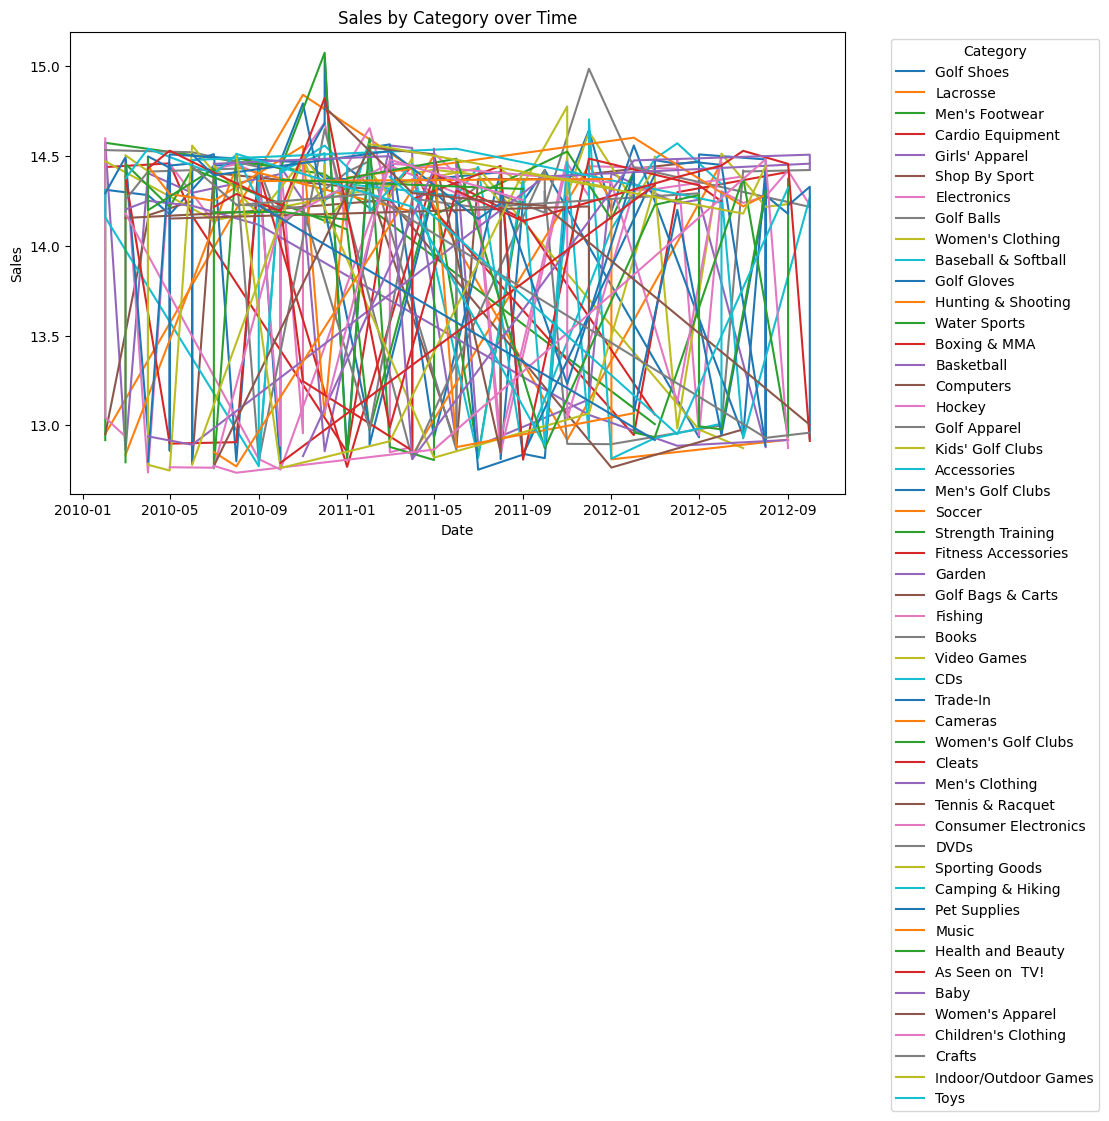

In [30]:
categories = df['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    # Filter the dataframe for each category
    product_data = df[df['Category'] == category]
        
    # Plot the sales over time for this category
    plt.plot(product_data['Date'], product_data['log_sales'], label=f'{category}')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Category over Time')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

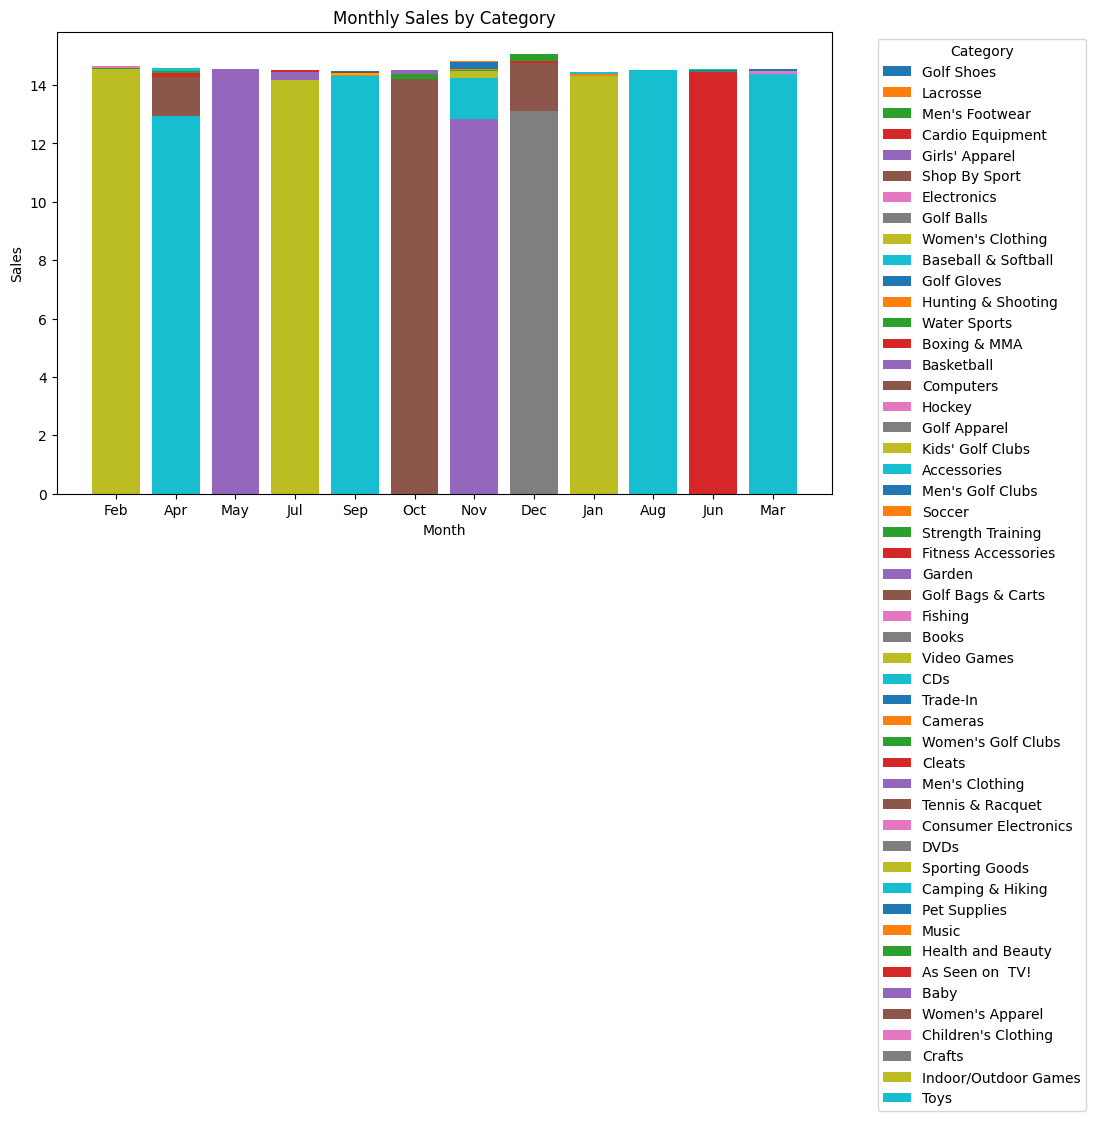

In [31]:
plt.figure(figsize=(10, 6))

for category in categories:
    # Filter the dataframe for each category
    product_data = df[df['Category'] == category]
        
    # Plot the sales over time for this category
    plt.bar(product_data['Month'], product_data['log_sales'], label=f'{category}')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales by Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [32]:
df.groupby('Category').count()

,Date,Sales,Promotional Period,Product Name,Product Price,Month,log_sales,scaled_sales,count
Category,,,,,,,,,
Accessories,28,28,28,28,28,28,28,28,28
As Seen on TV!,2,2,2,2,2,2,2,2,2
Baby,3,3,3,3,3,3,3,3,3
Baseball & Softball,14,14,14,14,14,14,14,14,14
Basketball,7,7,7,7,7,7,7,7,7
Books,7,7,7,7,7,7,7,7,7
Boxing & MMA,8,8,8,8,8,8,8,8,8
CDs,3,3,3,3,3,3,3,3,3
Cameras,5,5,5,5,5,5,5,5,5


In [33]:
df.shape

(490, 10)